## Scenario-based Hurricane Risk Analysis (SHRA) tool

In [1]:
# Import dependencies of Scenario-based Hurricane Risk Analysis (SHRA)
import time
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from scipy.spatial import distance
from scipy.stats import expon, lognorm
from pyproj import Proj
from pyproj import Proj, transform

In [2]:
start = time.time()

### 1. Hurricane Track Characteristics

In [3]:
# Import Hurricane Historical Tracks
data=pd.read_csv('InputTracks/hel_org.csv')

In [4]:
data. head(5)

,Sl,Time,Lat,Long,CP
0,1,0.0,31.60,78.30,943.00
1,2,0.5,31.66,78.33,942.17
2,3,1.0,31.72,78.35,941.33
3,4,1.5,31.78,78.38,940.50
4,5,2.0,31.83,78.40,939.67


In [5]:
%run -i Scenario_Hazard.py

In [6]:
n.head()

,Lat,Long,CP,Δp,Rmax,B,ρ,Ω
0,31.60,78.30,943.00,70.00,38.268623,1.321192,1.15,0.000073
1,31.66,78.33,942.17,70.83,38.141031,1.321244,1.15,0.000073
2,31.72,78.35,941.33,71.67,38.008495,1.321324,1.15,0.000073
3,31.78,78.38,940.50,72.50,37.876494,1.321401,1.15,0.000073
4,31.83,78.40,939.67,73.33,37.726398,1.321689,1.15,0.000073


### 2. Importing Building Invetory

In [7]:
# Importing Building Invetory of Testbed
blg=pd.read_csv('Sample_Buildings.csv')

In [8]:
blg.head(5)

,x,y,Z,id,index,OBJECTID,Type,Shape_Le,Area_ft2,Update_Y,...,LANDUSEDES,YEARBUIL,BASEMENT,STORYHEIGHT,HEATEDSQUA,STRUCTURES1,STRUCTURET,HAZUS,type,STRUCTURES
0,77.518615,34.441515,0,1,1,17196,Building New,274.566915,3326.702519,2016,...,Waterview,2003,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome
1,77.517539,34.441661,0,2,2,17197,Building New,156.050220,1446.453330,2016,...,Waterfront Ocean,1962,NONE,1,1214,Beach House,CEDAR/REDWOOD/CYPRESS,A70,A70,Beach House
2,77.518484,34.441721,0,3,3,17198,Building New,185.065047,1805.217729,2016,...,Waterview,2003,NONE,1,1806,Beach House,ALUMINUM/VINYL,A2,A2,Beach House
3,77.518277,34.441771,0,4,4,17199,Building New,116.684847,809.593414,2016,...,Waterview,2020,PART,2,3734,Beach House,HARD BOARD (HARDY BOARD),A18,A18,Beach House
4,77.518807,34.441739,0,5,5,17200,Building New,274.565998,3326.708935,2016,...,Townhome,2004,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome


#### 3. Estimate Wind Intensities for Buildings

In [9]:
%run -i Building_Wind_Analysis.py

In [10]:
BlgW.head(5)

,x,y,Z,id,index,OBJECTID,Type,Shape_Le,Area_ft2,Update_Y,...,BASEMENT,STORYHEIGHT,HEATEDSQUA,STRUCTURES1,STRUCTURET,HAZUS,type,STRUCTURES,ind,mph
0,77.518615,34.441515,0,1,1,17196,Building New,274.566915,3326.702519,2016,...,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome,1,151.766929
1,77.517539,34.441661,0,2,2,17197,Building New,156.050220,1446.453330,2016,...,NONE,1,1214,Beach House,CEDAR/REDWOOD/CYPRESS,A70,A70,Beach House,2,151.793712
2,77.518484,34.441721,0,3,3,17198,Building New,185.065047,1805.217729,2016,...,NONE,1,1806,Beach House,ALUMINUM/VINYL,A2,A2,Beach House,3,151.761493
3,77.518277,34.441771,0,4,4,17199,Building New,116.684847,809.593414,2016,...,PART,2,3734,Beach House,HARD BOARD (HARDY BOARD),A18,A18,Beach House,4,151.765687
4,77.518807,34.441739,0,5,5,17200,Building New,274.565998,3326.708935,2016,...,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome,5,151.750580


In [11]:
BlgW.drop(['ind'], axis=1, inplace=True)

Text(0, 0.5, 'Wind Speed(mph)')

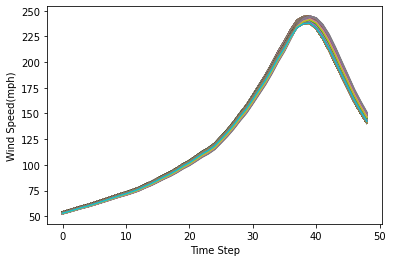

In [12]:
VG1.plot.line(legend=None)
plt.xlabel('Time Step')
plt.ylabel('Wind Speed(mph)')

### Damage Simulation

In [13]:
#Assign random seed
seed=1234
np.random.seed(seed)

In [14]:
#Building invetory dataframe
node = BlgW
node.head(3)

,x,y,Z,id,index,OBJECTID,Type,Shape_Le,Area_ft2,Update_Y,...,YEARBUIL,BASEMENT,STORYHEIGHT,HEATEDSQUA,STRUCTURES1,STRUCTURET,HAZUS,type,STRUCTURES,mph
0,77.518615,34.441515,0,1,1,17196,Building New,274.566915,3326.702519,2016,...,2003,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome,151.766929
1,77.517539,34.441661,0,2,2,17197,Building New,156.050220,1446.453330,2016,...,1962,NONE,1,1214,Beach House,CEDAR/REDWOOD/CYPRESS,A70,A70,Beach House,151.793712
2,77.518484,34.441721,0,3,3,17198,Building New,185.065047,1805.217729,2016,...,2003,NONE,1,1806,Beach House,ALUMINUM/VINYL,A2,A2,Beach House,151.761493


In [15]:
#Check - the number of building structural archetypes
node.type.value_counts().shape[0]

31

In [16]:
%run -i Damage_Simulation

In [17]:
dmg.head()

,x,y,Z,id,index,OBJECTID,Type,Shape_Le,Area_ft2,Update_Y,...,type,STRUCTURES,mph,DS1,DS2,DS3,DS4,dmg,kmh,Dislocation
0,77.518615,34.441515,0,1,1,17196,Building New,274.566915,3326.702519,2016,...,C26,Beach Townhome,151.766929,0.995395,0.968873,0.886247,0.6533,4,244.344756,1
1,77.517539,34.441661,0,2,2,17197,Building New,156.050220,1446.453330,2016,...,A70,Beach House,151.793712,0.921588,0.471724,0.096965,0.004385,2,244.387876,0
2,77.518484,34.441721,0,3,3,17198,Building New,185.065047,1805.217729,2016,...,A2,Beach House,151.761493,0.980637,0.869656,0.509513,0.169325,3,244.336004,1
3,77.518277,34.441771,0,4,4,17199,Building New,116.684847,809.593414,2016,...,A18,Beach House,151.765687,0.997125,0.980053,0.878562,0.627313,4,244.342756,1
4,77.518807,34.441739,0,5,5,17200,Building New,274.565998,3326.708935,2016,...,C26,Beach Townhome,151.750580,0.995385,0.968815,0.886058,0.652902,4,244.318434,1


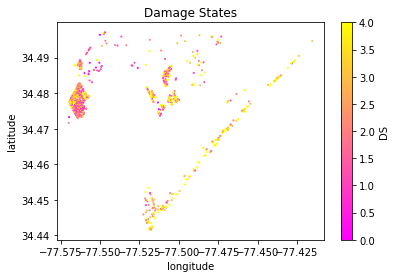

In [18]:
#Plotting Damage States
x = dmg.x*1
y = dmg.y
fig = plt.figure(figsize=(6,4))
plt.scatter(-x, y, c=dmg.dmg, s=1)
plt.spring()
plt.colorbar(label='DS')
# plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Damage States');
plt.show()

In [19]:
# dmg.to_csv('Output/Helene_out.csv')

### Social Impact Estimation

In [20]:
# no. of dislocated buildings
n_dis=dmg[dmg.dmg>2].shape[0]

# no. of dislocated persons
dis_percent=dmg[dmg.dmg>2].shape[0]/dmg.dmg.value_counts().sum()
n_dis, dis_percent

(473, 0.473)

In [21]:
n_damaged=dmg.dmg.value_counts().sum()-dmg[dmg.dmg==0].shape[0]
# damaged households(%)
d_percent=1-(dmg[dmg.dmg==0].shape[0]/dmg.dmg.value_counts().sum())
n_damaged, d_percent

(974, 0.974)

In [22]:
#Sort Res Building DataFrame
res=dmg[dmg.STRUCTURES.isin(['Single Family','Multi-Section MH','Beach House','Singlewide M/H','Duplex','Town Home','Beach Duplex',
                            'Condominium','Beach Townhome','Multi-Family','Beach Condo','Apartment','Mixed Use Res/Com'])]

In [23]:
#Sort Office Buildings
office=dmg[dmg.STRUCTURES.isin(['RETAIL','OFFICES/SERVICES','AUTO SERVICE','WAR_S','WAR_D','SPECIAL/INSTITUTIONAL',
                                'RESTAURANT','PUBLIC BUILDINGS','MEDICAL BUILDING','CONVERSION','MOTEL','PS','DC',
                                'K12','THEATER/RECREATION'])]

In [24]:
dis_office=office[office.dmg>2]
dis_office.shape

(0, 34)

In [25]:
#Sort School Buildings
school=dmg[dmg.STRUCTURES.isin(['PS','DC','K12'])]
school.shape

(0, 34)

In [26]:
dis_school=school[school.dmg>2]
dis_school.shape

(0, 34)

In [27]:
#Total Buildings
t_building=res.shape[0]+office.shape[0]
t_building

1000

#### Dislocated population

In [28]:
dis_res=res[res.dmg>2]
dis_res.shape

(473, 34)

In [29]:
#No. of dislocated Units
No_dis_unit=dis_res['No. of housing units'].sum()
No_dis_unit

549

In [30]:
# No. of dislocated population
No_dis_ppl=dis_res['No. of housing units'].sum()*2.72
No_dis_ppl

1493.2800000000002

#### Employment disruption

In [31]:
dlo=dmg[dmg.dmg>2]

In [32]:
n_cov=(dlo[(dlo.STRUCTURES=='CONVERSION')].Area_ft2/750).round(0).sum()
n_pub=(dlo[(dlo.STRUCTURES=='PUBLIC BUILDINGS')].Area_ft2/750).round(0).sum()
n_spe=(dlo[(dlo.STRUCTURES=='SPECIAL/INSTITUTIONAL')].Area_ft2/3000).round(0).sum()
n_the=(dlo[(dlo.STRUCTURES=='THEATER/RECREATION ')].Area_ft2/1500).round(0).sum()
n_auto=(dlo[(dlo.STRUCTURES=='AUTO SERVICE')].Area_ft2/600).round(0).sum()
n_htl=(dlo[(dlo.STRUCTURES=='HOTEL/CLUB')].Area_ft2/1500).round(0).sum()
n_mdl=(dlo[(dlo.STRUCTURES=='MEDICAL BUILDING')].Area_ft2/225).round(0).sum()
n_mtl=(dlo[(dlo.STRUCTURES=='MOTEL')].Area_ft2/1500).round(0).sum()
n_off=(dlo[(dlo.STRUCTURES=='OFFICES/SERVICES')].Area_ft2/250).round(0).sum()
n_res=(dlo[(dlo.STRUCTURES=='RESTAURANT')].Area_ft2/435).round(0).sum()
n_ret=(dlo[(dlo.STRUCTURES=='RETAIL')].Area_ft2/550).round(0).sum()
n_dc=(dlo[(dlo.STRUCTURES=='DC')].Area_ft2/630).round(0).sum()
n_12=(dlo[(dlo.STRUCTURES=='K12')].Area_ft2/1300).round(0).sum()
n_ps=(dlo[(dlo.STRUCTURES=='PS')].Area_ft2/2100).round(0).sum()
n_wd=(dlo[(dlo.STRUCTURES=='WAR_D')].Area_ft2/2500).round(0).sum()
n_ws=(dlo[(dlo.STRUCTURES=='WAR_S ')].Area_ft2/20000).round(0).sum()

In [33]:
# No. of employment impacted
N_uEmy=n_cov+n_pub+n_spe+n_the+n_auto+n_htl+n_mdl+n_mtl+n_off+n_res+n_ret+n_dc+n_12+n_ps+n_wd+n_ws
N_uEmy

0.0

#### Education Closure

In [34]:
#Num of Students Impacted
s_ds=(dlo[(dlo.STRUCTURES=='DC')].Area_ft2/550).round(0).sum()
s_12=(dlo[(dlo.STRUCTURES=='K12')].Area_ft2/140).round(0).sum()
s_ps=(dlo[(dlo.STRUCTURES=='PS')].Area_ft2/150).round(0).sum()
N_sImp=s_ds+s_12+s_ps
N_sImp

0.0

#### Damage Ratio and Cost Analysis

In [35]:
%run -i Cost_Analysis.py

In [36]:
#Total Cost in Millon $USD
sum(RCost)/1000000

110.1573299986035

In [37]:
V3=list(dmg.id)
x=list(-dmg.x)
y=list(dmg.y)
vv= list(DRatio)
pf = {'id':V3,'x':x, 'y':y,'DR':vv}
dr=pd.DataFrame(pf)

In [38]:
# dr.to_csv('DR_Helene.csv')

In [39]:
end = time.time()

In [40]:
t_time=end-start
print ('Analysis time:', t_time/60, 'min')

Analysis time: 0.060764368375142416 min
